In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats

In [22]:
df = pd.read_csv('mentorat_performance.csv')
df.tail()

,Groupe,Performance Avant,Performance Après
295,Non-mentoré,51.865573,51.874972
296,Non-mentoré,53.005884,53.897747
297,Non-mentoré,49.585579,49.730935
298,Non-mentoré,52.314840,53.149266
299,Non-mentoré,46.580349,47.486945


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Groupe             300 non-null    object 
 1   Performance Avant  300 non-null    float64
 2   Performance Après  300 non-null    float64
dtypes: float64(2), object(1)
memory usage: 7.2+ KB


In [24]:
df.describe()

,Performance Avant,Performance Après
count,300.000000,300.000000
mean,50.210414,56.363197
std,6.025125,7.280463
min,40.004750,40.897006
25%,44.939527,51.248587
50%,50.520556,56.562118
75%,55.471365,60.876397
max,59.926716,73.568877


In [25]:
print(f"{df.duplicated().sum()} valeurs dupliquées dans le dataset")
print(f"{df.duplicated().sum()} valeurs dupliquées dans le dataset")

0 valeurs dupliquées dans le dataset
0 valeurs dupliquées dans le dataset


In [26]:
# Séparer les groupes
groupe_mentore = df[df['Groupe'] == 'Mentoré']

# Calculer la variation moyenne de la performance pour le groupe mentoré
variation_moyenne_mentore = groupe_mentore['Performance Après'].mean() - groupe_mentore['Performance Avant'].mean()

print(f"Variation moyenne de la performance pour le groupe mentoré : {variation_moyenne_mentore:.2f}")

Variation moyenne de la performance pour le groupe mentoré : 9.83


In [27]:
# Séparer les groupes
groupe_non_mentore = df[df['Groupe'] == 'Non-mentoré']

# Calculer la variation moyenne de la performance pour le groupe non mentoré
variation_moyenne_non_mentore = groupe_non_mentore['Performance Après'].mean() - groupe_mentore['Performance Avant'].mean()

print(f"Variation moyenne de la performance pour le groupe mentoré : {variation_moyenne_non_mentore:.2f}")

Variation moyenne de la performance pour le groupe mentoré : 2.93


Taille du groupe mentoré : 150
Taille du groupe non mentoré : 150


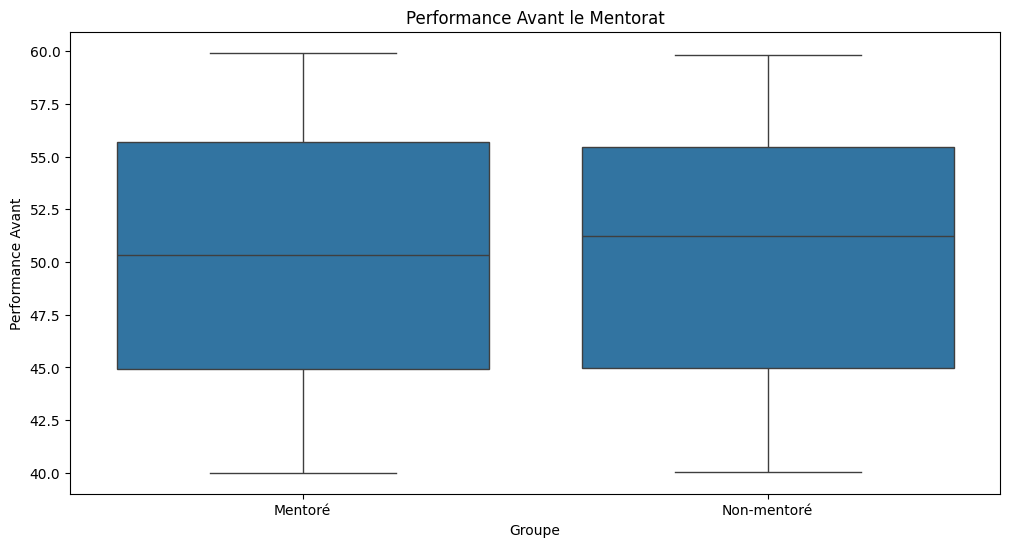

In [28]:
# Définir les groupes de traitement et de contrôle
traitement = df[df['Groupe'] == 'Mentoré']
controle = df[df['Groupe'] == 'Non-mentoré']
# Vérifier les tailles des groupes
print(f"Taille du groupe mentoré : {len(traitement)}")
print(f"Taille du groupe non mentoré : {len(controle)}")
# Visualiser la performance avant et après le mentorat
plt.figure(figsize=(12, 6))
sns.boxplot(x='Groupe', y='Performance Avant', data=df)
plt.title('Performance Avant le Mentorat')
plt.show()

Performance avant traitement : 49.98
Performance avant contrôle : 50.44
Performance après traitement : 59.81
Performance après contrôle : 52.91


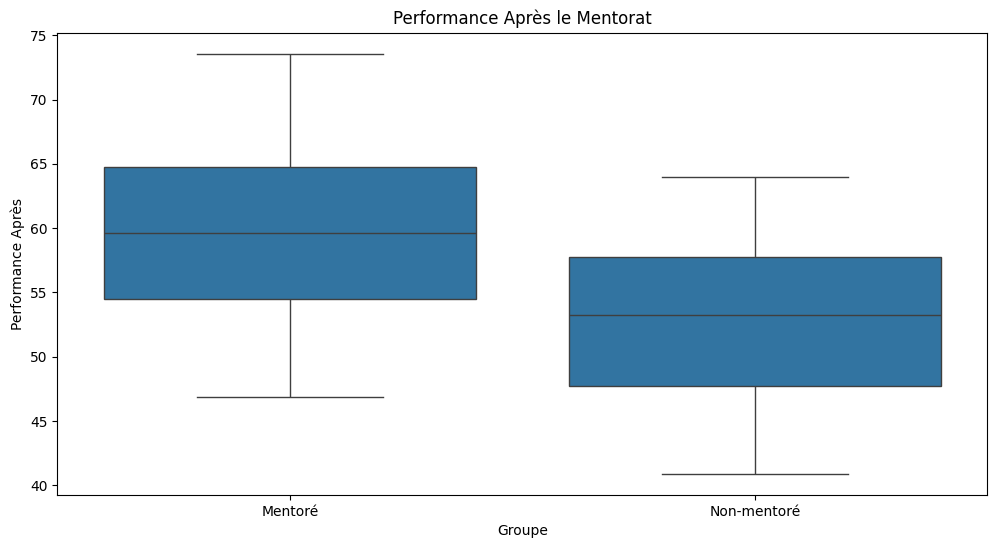

In [29]:
# Mesurer la performance avant et après l'intervention
performance_avant_traitement = traitement['Performance Avant'].mean()
performance_avant_controle = controle['Performance Avant'].mean()
performance_apres_traitement = traitement['Performance Après'].mean()
performance_apres_controle = controle['Performance Après'].mean()
print(f"Performance avant traitement : {performance_avant_traitement:.2f}")
print(f"Performance avant contrôle : {performance_avant_controle:.2f}")
print(f"Performance après traitement : {performance_apres_traitement:.2f}")
print(f"Performance après contrôle : {performance_apres_controle:.2f}")
# Visualiser les performances avant et après le mentorat
plt.figure(figsize=(12, 6))
sns.boxplot(x='Groupe', y='Performance Après', data=df)
plt.title('Performance Après le Mentorat')
plt.show()

In [30]:
# Estimer l'effet causal
effet_causal = performance_apres_traitement - performance_apres_controle
print(f"Effet causal (Différences-en-Différences) : {effet_causal:.2f}")

Effet causal (Différences-en-Différences) : 6.90


In [31]:
# Estimer l'effet causal avec la régression linéaire
X = df[['Performance Avant', 'Groupe']]
X = pd.get_dummies(X, drop_first=True)  # Convertir le groupe en variables indicatrices
y = df['Performance Après']
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [32]:
# Coefficients du modèle
coefficients = model.coef_
intercept = model.intercept_
print(f"Intercept : {intercept:.2f}")
print(f"Coefficient de la performance avant : {coefficients[0]:.2f}")

Intercept : 9.84
Coefficient de la performance avant : 1.00


In [33]:
# Tester la significativité de cet effet à l’aide d’un test de Student.
# Calculer la statistique t et la p-value
t_stat, p_value = stats.ttest_ind(traitement['Performance Après'], controle['Performance Après'])
print(f"Statistique t : {t_stat:.2f}")
print(f"p-value : {p_value:.4f}")

Statistique t : 9.31
p-value : 0.0000


In [35]:
# Conclure sur l’impact du mentorat sur la performance.
alpha = 0.05
if p_value < alpha:
    print("Il y a une différence significative entre les groupes mentoré et non mentoré.")
else:
    print("Il n'y a pas de différence significative entre les groupes mentoré et non mentoré.")

Il y a une différence significative entre les groupes mentoré et non mentoré.
